In [ ]:
import matplotlib.pyplot as plt
import sys
import subprocess
import pickle
import os

exp_device = 'cuda'
exp_amp = False
exp_skip_accuracy = False
exp_batch_size = {'bert-mini':736, 'bert-base':128}

def run_exp(model, factor, dropout, target='sparse'):
    global exp_device, exp_amp, exp_skip_accuracy, exp_batch_size
    batch_size = exp_batch_size[model]
    cmd = f"python -m main.benchmark_approx"
    cmd = cmd + " --batch-size {batch_size}"
    cmd = cmd + " --factor {factor}"
    cmd = cmd + " --target {target}"
    cmd = cmd + " --model {model}"
    cmd = cmd + " --dropout {dropout}"
    cmd = cmd + " --device {exp_device}"
    if exp_skip_accuracy: cmd = cmd + " --skip-accuracy"
    if exp_amp: cmd = cmd + " --amp"
    print(cmd)
    subprocess.call(cmd.split(' '))
    with open('bench_result.pkl', 'rb') as f:
        obj = pickle.load(f)
        speed, acc = obj
    os.remove('bench_result.pkl')
    print('done', speed, acc)
    return speed, acc

def plot_exp_by_factor(model, factor):
    dropouts = [0.1, 0.25, 0.5, 0.75, 0.99]
    speedups = []
    accuracies = []
    bert_speed, bert_acc = run_exp(model, factor, 0.5, 'bert')
    for dropout in dropouts:
        speed, acc = run_exp(model, factor, dropout)
        speedups.append(speed / bert_speed)
        accuracies.append(acc / bert_acc)
    return dropouts, speedups, accuracies

def plot_exp(model='bert-mini'):
    d, s4, a4 = plot_exp_by_factor(model, 4)
    d, s8, a8 = plot_exp_by_factor(model, 8)
    d, s16, a16 = plot_exp_by_factor(model, 16)

    print('speedup')
    plt.plot(d, s4, label='factor:4')
    plt.plot(d, s8, label='factor:8')
    plt.plot(d, s16, label='factor:16')
    plt.legend()
    plt.show()

    print('acc reproduce')
    plt.plot(d, a4, label='factor:4')
    plt.plot(d, a8, label='factor:8')
    plt.plot(d, a16, label='factor:16')
    plt.legend()
    plt.show()

    return [(d, s4, a4), (d, s8, a8), (d, s16, a16)]


python -m main.benchmark_approx --batch-size 736 --factor 4 --target bert --model bert-mini --dropout 0.5
done 2886.0501337605624 0.9347368421052632
python -m main.benchmark_approx --batch-size 736 --factor 4 --target sparse --model bert-mini --dropout 0.1
done 3250.849752301877 0.8881578947368421
python -m main.benchmark_approx --batch-size 736 --factor 4 --target sparse --model bert-mini --dropout 0.25
done 3028.371851000508 0.924078947368421
python -m main.benchmark_approx --batch-size 736 --factor 4 --target sparse --model bert-mini --dropout 0.5
done 2725.0401776020485 0.9339473684210526
python -m main.benchmark_approx --batch-size 736 --factor 4 --target sparse --model bert-mini --dropout 0.75
done 2470.9329952881358 0.9347368421052632
python -m main.benchmark_approx --batch-size 736 --factor 4 --target sparse --model bert-mini --dropout 0.99
done 2263.1644942565836 0.9347368421052632
python -m main.benchmark_approx --batch-size 736 --factor 8 --target bert --model bert-mini --dr

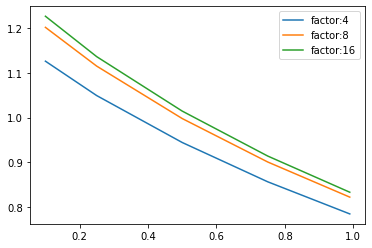

acc reproduce


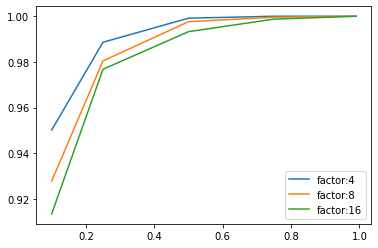

In [1]:
exp_device = 'cuda'
exp_amp = False
exp_skip_accuracy = False
exp_batch_size = {'bert-mini':736, 'bert-base':128}

result_mini = plot_exp('bert-mini')

python -m main.benchmark_approx --batch-size 128 --factor 4 --target bert --model bert-base --dropout 0.5
done 379.00328395159613 0.9252631578947368
python -m main.benchmark_approx --batch-size 128 --factor 4 --target sparse --model bert-base --dropout 0.1
done 595.9189737162073 0.3563157894736842
python -m main.benchmark_approx --batch-size 128 --factor 4 --target sparse --model bert-base --dropout 0.25
done 502.31523450777104 0.8111842105263158
python -m main.benchmark_approx --batch-size 128 --factor 4 --target sparse --model bert-base --dropout 0.5
done 401.7870444361422 0.9161842105263158
python -m main.benchmark_approx --batch-size 128 --factor 4 --target sparse --model bert-base --dropout 0.75
done 332.7349984796366 0.9255263157894736
python -m main.benchmark_approx --batch-size 128 --factor 4 --target sparse --model bert-base --dropout 0.99
done 288.674335736409 0.9252631578947368
python -m main.benchmark_approx --batch-size 128 --factor 8 --target bert --model bert-base --drop

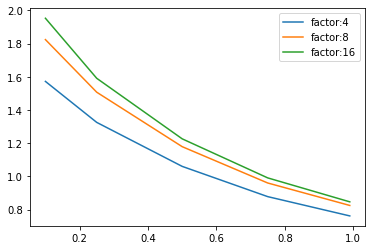

acc reproduce


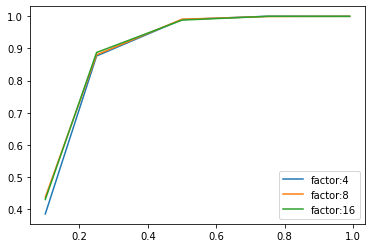

In [2]:
exp_device = 'cuda'
exp_amp = False
exp_skip_accuracy = False
exp_batch_size = {'bert-mini':736, 'bert-base':128}

result_base = plot_exp('bert-base')

In [ ]:
exp_device = 'cpu'
exp_amp = False
exp_skip_accuracy = True
exp_batch_size = {'bert-mini':16, 'bert-base':4}

result_mini = plot_exp('bert-mini')

In [ ]:
exp_device = 'cpu'
exp_amp = False
exp_skip_accuracy = True
exp_batch_size = {'bert-mini':16, 'bert-base':4}

result_mini = plot_exp('bert-base')

In [ ]:
exp_device = 'cuda'
exp_amp = True
exp_skip_accuracy = True
exp_batch_size = {'bert-mini':736, 'bert-base':128}

result_mini = plot_exp('bert-mini')